In [1]:
%pylab inline
from pathlib import Path
import h5py
import sys
path_to_script =  Path("~/projects/scaffan/").expanduser()
sys.path.insert(0,str(path_to_script))
import scaffan
import io3d
import scaffan.image as scim
import scipy
import scipy.ndimage.morphology

Populating the interactive namespace from numpy and matplotlib
add path C:\Users\Jirik\Downloads\openslide-win64-20171122\bin


In [3]:
# fn = io3d.datasets.join_path("medical", "orig", "CMU-1.ndpi", get_root=True)
# fn = io3d.datasets.join_path("medical/orig/Scaffan-analysis/PIG-003_J-18-0165_HE.ndpi", get_root=True)
fn = io3d.datasets.join_path("medical", "orig", "sample_data", "SCP003", "SCP003.ndpi", get_root=True)
print(f"filename: {fn}")
anim = scim.AnnotatedImage(fn)

2019-09-18 12:02:55.589 | DEBUG    | scaffan.image:__init__:173 - Reading file C:\Users\Jirik/data/medical\orig\sample_data\SCP003\SCP003.ndpi
2019-09-18 12:02:55.598 | DEBUG    | scaffan.image:__init__:187 - Reading the annotation


filename: C:\Users\Jirik/data/medical\orig\sample_data\SCP003\SCP003.ndpi


2019-09-18 12:02:56.502 | DEBUG    | scaffan.annotation:read_annotations:119 - windows annotation output:b'2019-09-18 12:02:56.399 | DEBUG    | scaffan.annotation:ndpa_to_json:71 - PATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\r\n'


# Views

The View is extracted from an annotated image by center or location (upper left corner). Additional information is size of
view in pixels or in mm. A [openslide](https://openslide.org/api/python/) package is called in background.

## Get grayscale image by center

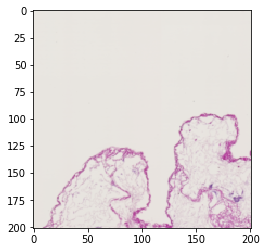

In [26]:
pixelsize_mm = [0.005, 0.005]

view = anim.get_view(center=(16000,10000), size_mm=[1, 1], pixelsize_mm=pixelsize_mm)
img = view.get_region_image(as_gray=False)
plt.imshow(img)
# view = anim.get_views(ann_ids, pixelsize_mm=pixelsize_mm)[0]



## Get grayscale image by annotation color

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 27, 28, 31, 32]


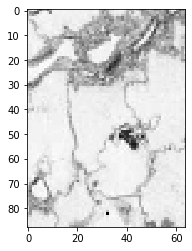

In [34]:
ann_ids = anim.select_annotations_by_color("#000000")
print(ann_ids)
view = anim.get_views(ann_ids, level=7)[0]
img = view.get_region_image(as_gray=True)
plt.imshow(img, cmap='gray')

# Change one view into other view

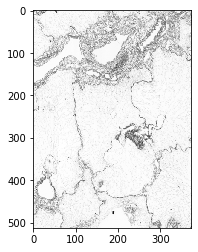

In [36]:
detail_view = view.to_pixelsize(pixelsize_mm=[0.005, 0.005])
img = detail_view.get_region_image(as_gray=True)
plt.imshow(img, cmap='gray')